# 🌳 Tree-Mendous: Interactive Interval Tree Visualizations

This notebook provides interactive visualizations and analysis of different interval tree implementations.

## Setup and Imports


In [1]:
import sys
import time
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

from treemendous.basic.boundary import IntervalManager
from treemendous.basic.summary import SummaryIntervalTree
from treemendous.basic.treap import IntervalTreap
from treemendous.basic.boundary_summary import BoundarySummaryManager

print("✅ All implementations loaded successfully!")


✅ All implementations loaded successfully!


## 📊 Interval Layout Visualization

Let's visualize how intervals are laid out in memory and how different operations affect the structure.


Initial state: Full availability


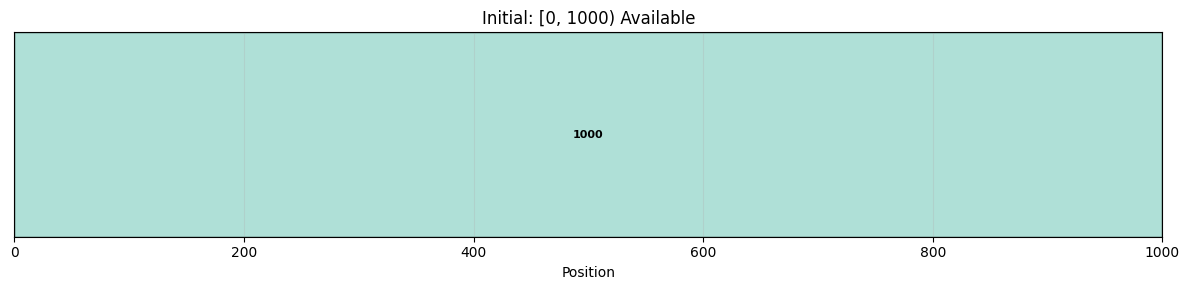


After reservations:


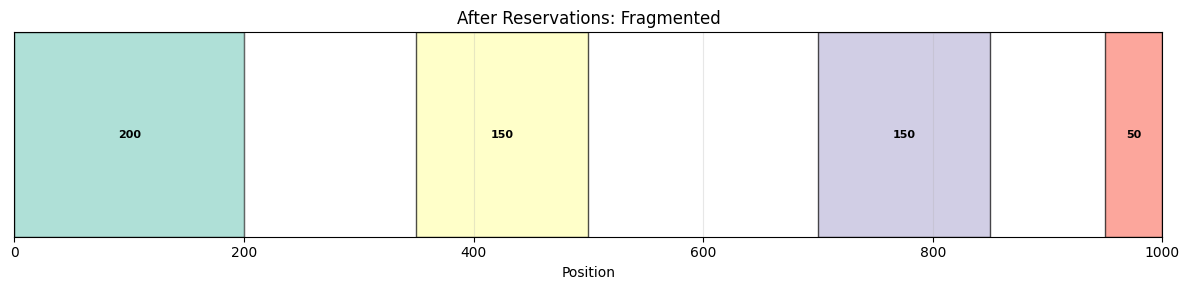

Total available space: 550 units
Fragmentation: 4 separate intervals


In [2]:
def plot_intervals(intervals, title="Interval Layout", total_span=1000, figsize=(12, 3)):
    """Create a visual plot of interval allocation"""
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot each interval as a rectangle
    for i, interval in enumerate(intervals):
        width = interval.end - interval.start
        rect = patches.Rectangle((interval.start, 0), width, 1, 
                               linewidth=1, edgecolor='black', 
                               facecolor=plt.cm.Set3(i % 12), alpha=0.7)
        ax.add_patch(rect)
        
        # Add interval label
        ax.text(interval.start + width/2, 0.5, f'{width}', 
                ha='center', va='center', fontsize=8, fontweight='bold')
    
    ax.set_xlim(0, total_span)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Position')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    
    # Remove y-axis as it's not meaningful
    ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

# Demo: Progressive interval allocation
manager = IntervalManager()
manager.release_interval(0, 1000)

print("Initial state: Full availability")
plot_intervals(manager.get_intervals(), "Initial: [0, 1000) Available")

# Reserve some intervals
manager.reserve_interval(200, 350)
manager.reserve_interval(500, 700)
manager.reserve_interval(850, 950)

print("\nAfter reservations:")
plot_intervals(manager.get_intervals(), "After Reservations: Fragmented")

# Show available space
total_free = manager.get_total_available_length()
print(f"Total available space: {total_free} units")
print(f"Fragmentation: {len(manager.get_intervals())} separate intervals")
